In [26]:
import os
import numpy as np
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords # Text data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression
import string
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [2]:
path_pos = "./data/pos/"
path_neg = "./data/neg/"

In [3]:
list_pos = os.listdir(path_pos)
list_neg = os.listdir(path_neg)

In [4]:
doc_pos=[]
doc_neg=[]

In [5]:
stemmer = PorterStemmer()

In [6]:
stop_words = stopwords.words("english")
stop_words.extend(list(string.punctuation))
stop_words = set(stop_words)

In [7]:
for p in list_pos:
    f = open(os.path.join(path_pos, p), 'r')
    lines = f.readlines()
    d=""
    for l in lines:
        lw = wordpunct_tokenize(l)
        for w in lw:
            if w not in stop_words and not w.isnumeric():
                d+=stemmer.stem(w)+' '
    doc_pos.append(d)
    

In [8]:
(len(doc_pos),doc_pos[132])

(1000,
 'quaid star man taken proffes dragonslay feel betray dragon earli movi run last dragon exist genuin amus battl two result standoff quaid dragon mouth sword point dragon brain eventu decid call truce work deal sinc last dragon pretend die quaid abl get paid scam work first come town without money instead town sacrific girl dragon cours draco nice droagon eat howev amus scene draco hit young girl cours probabl tell plot silli movi know take serious right time unlik eddi seriou time could probabl call mediev comedi laugh eddi spi hard combin denni quaid make fine hero pete posthlewait provid ghreat comedi monk journey dina meyer appeal sacrif girl let face movi realli dragon amaz creation conneri voic ilm team provid us truli magnific dragon go see movi strong hard core mediev epic go wrong movi go dragon dissapoint provid plenti laugh smooth bore part script ')

In [9]:
for n in list_neg:
    f = open(os.path.join(path_neg, n), 'r')
    lines = f.readlines()
    d=""
    for l in lines:
        lw = wordpunct_tokenize(l)    
        for w in lw:
            if w not in stop_words and not w.isnumeric():
                d+=stemmer.stem(w)+' '
    doc_neg.append(d)

In [10]:
(len(doc_neg),doc_neg[132])

(1000,
 'showgirl first big budget big studio film receiv nc rate releas last year came time senat bob dole politican chastis entertain industri promot sex violenc showgirl indic hollywood futur folk washington focu attack danger threat american valu -- bad moviemak showgirl relentlessli exploit look la vega strip scene film turn trashi subject matter director paul verhoeven writer joe eszterha collabor anoth shock valu project basic instinct follow plight young woman teen tv star elizabeth berkley determin make name topless dancer hackney premis begin surprisingli stock charact truck demand produc loyal friend bitchi competitor lest forget scummi club owner cours attempt charact develop coher storylin window dress film main attract -- endless parad full frontal nuditi unfortun showgirl satisfi depart verhoeven slam bang face style direct prove neither arous erot make matter wors forc sit movi cloth scene cover laughabl act absurd dialogu ever spoken film histori verhoeven ezsterha des

In [11]:
cv=TfidfVectorizer()
cv.fit(doc_pos+doc_neg)

TfidfVectorizer()

In [12]:
x_pos = cv.transform(doc_pos)
x_pos = x_pos.toarray()
y_pos = np.ones((1000,))
pd.DataFrame(x_pos,columns=cv.get_feature_names_out())

,00,0009f,10,100m,10b,10th,11th,12th,13th,14th,...,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.036747,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [13]:
x_neg = cv.transform(doc_neg)
x_neg = x_neg.toarray()
y_neg = np.zeros((1000,))
pd.DataFrame(x_neg,columns=cv.get_feature_names_out())

,00,0009f,10,100m,10b,10th,11th,12th,13th,14th,...,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
X = np.concatenate([x_pos,x_neg],axis=0)
y = np.concatenate([y_pos,y_neg],axis=0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=43)

In [15]:
X_train.shape, y_train.shape    

((1600, 25719), (1600,))

In [16]:
clf = LinearSVC(C=0.5)
clf.fit(X_train, y_train)

LinearSVC(C=0.5)

In [17]:
y = clf.predict(X_train)
np.sum((y == y_train))/y.shape[0]

0.99625

In [18]:
y = clf.predict(X_test)
np.sum((y == y_test))/y.shape[0]

0.8675

In [19]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

LogisticRegression()

In [20]:
y = clf2.predict(X_train)
np.sum((y == y_train))/y.shape[0]

0.970625

In [21]:
y = clf2.predict(X_test)
np.sum((y == y_test))/y.shape[0]

0.8475

In [22]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [23]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [25]:
sum(explained_variance)*100

0.41278358305529317

In [31]:
clf2_ = LogisticRegression()
clf2_.fit(X_train, y_train)

LogisticRegression()

In [32]:
y = clf2_.predict(X_test)
np.sum((y == y_test))/y.shape[0]

0.6025

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


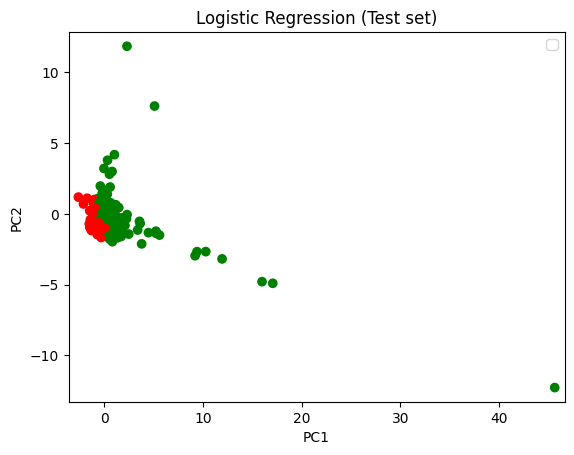

In [34]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
					stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
					stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, clf2.predict(np.array([X1.ravel(),
# 			X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
# 			cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# for i, j in enumerate(np.unique(y_set)):, label = j
plt.scatter(X_set[:, 0], X_set[:, 1],
			c = ListedColormap(('red', 'green'))(y_set))

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()
